<a href="https://colab.research.google.com/github/kirwarobert/cnn/blob/main/robert_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
#  undestanding the data structure
df.head() # Displays the first 5 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# Displaying the last five rows
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
#  Handling missing values
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [ ]:
# Handling Duplicates
print("\nchecking for duplicates:")
df.duplicated().sum()


checking for duplicates:


np.int64(0)

In [ ]:
# Print the actual column names in the DataFrame
print(df.columns)

# Access the correct column names based on the output. For example:
X = df[['housing_median_age']].values  # Predictor, Assuming the correct column name is 'housing_median_age'
Y = df[['total_rooms']].values  # target, Assuming the correct column name is 'total_rooms'

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [ ]:
# select one feature for simple linear regression
X = df[['housing_median_age']].values #Predictor, Changing the column to match df.columns
Y = df[['total_rooms']].values #target, Changing the column to match df.columns

In [ ]:
# Split into training and test set
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.2, random_state =42)

In [ ]:
Y_train

array([[2711.],
       [3619.],
       [ 444.],
       ...,
       [ 901.],
       [3648.],
       [2452.]])

In [ ]:
# Y_train_imputed = Y_train.fillna(Y_train.mean())


mean_value = np.nanmean(Y_train)  # Calculate mean ignoring NaN values
Y_train_imputed = np.nan_to_num(Y_train, nan=mean_value)
# create and train the model
model = LinearRegression()
model.fit(X_train, Y_train_imputed)

LinearRegression()

In [ ]:
print(f"Intercept: {model.intercept_}")
print(f"coefficient: {model.coef_[0]}")

Intercept: [4432.28795042]
coefficient: [-62.5716426]


In [ ]:
# Predict
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([[3869.14316706],
       [1178.56253542],
       [3431.14166888],
       ...,
       [3243.42674109],
       [1616.56403359],
       [2742.85360032]])

In [ ]:
X_test

array([[ 9.],
       [52.],
       [16.],
       ...,
       [19.],
       [45.],
       [27.]])

In [ ]:
 # Replace NaN values in Y_test and y_pred with the mean of the respective arrays(removing NaN values in my dataset)
Y_test = np.nan_to_num(Y_test, nan=np.nanmean(Y_test))
y_pred = np.nan_to_num(y_pred, nan=np.nanmean(y_pred))

# Evaluate Model
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [ ]:
# Model evaluation
print(f"Mean Absoluter Error:{mae}")
print(f"Mean squared Error:{mse}")
print(f"R2 score: {r2}")

Mean Absoluter Error:1285.6885068155125
Mean squared Error:4342139.890831151
R2 score: 0.12324557625391319


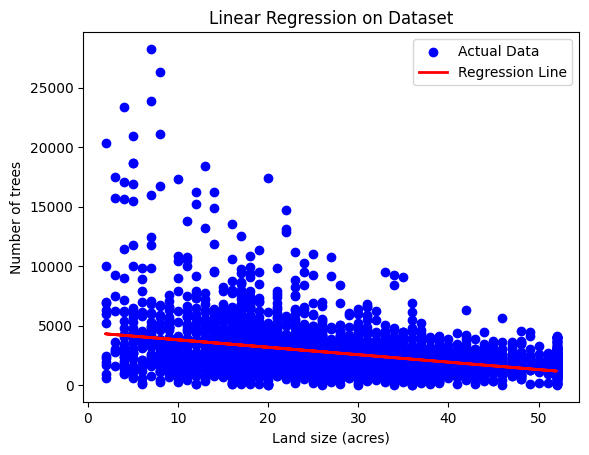

In [ ]:
# visualization
plt.scatter(X_test, Y_test ,color = 'blue', label = 'Actual Data')
plt.plot(X_test, y_pred, color = 'red', linewidth= 2,label = 'Regression Line')
plt.xlabel('Land size (acres)')
plt.ylabel('Number of trees')
plt.legend()
plt.title('Linear Regression on Dataset')
plt.show()

In [ ]:
# Function to predict the number of trees that can fit in a given land size (acres)
def predict_value(Land_size_acres_value):
    prediction = model.predict(np.array([[Land_size_acres_value]]))
    print(f"Predicted number of trees that can fit a given land size (acres) {Land_size_acres_value}: {prediction[0]}")
    return prediction[0]

# Example prediction
Land_size_acres_input = 20
predict_value(Land_size_acres_input)


Predicted number of trees that can fit a given land size (acres) 20: [3180.8550985]


array([3180.8550985])

In [ ]:
# Statistical methods for EDA
# KEY STATISTICS
# Get the actual column names from the DataFrame
print(df.columns)

# Assuming the correct column name is 'housing_median_age'
# (Replace with the actual column name from the above output)
print("Mean:", df['housing_median_age'].mean())  # calculating and print the mean
print("variance:", df['housing_median_age'].var())  # calculating and print the variance

# Correlation matrix for numeric columns
print("correlation Matrix:\n", df.select_dtypes(include=[np.number]).corr())

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
Mean: 28.58935294117647
variance: 158.4309825802886
correlation Matrix:
                     longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925208           -0.114250     0.047010   
latitude            -0.925208  1.000000            0.016454    -0.038773   
housing_median_age  -0.114250  0.016454            1.000000    -0.360984   
total_rooms          0.047010 -0.038773           -0.360984     1.000000   
total_bedrooms       0.071802 -0.069373           -0.320434     0.928403   
population           0.101674 -0.111261           -0.295890     0.860170   
households           0.059628 -0.074902           -0.302754     0.919018   
median_income       -0.015485 -0.080303           -0.115932     0.195383   
median_house_value  -0.044982 -0.144917            0

In [ ]:
# Hypotheisis
# Get the actual column names from the DataFrame
print(df.columns)

# Assuming the correct column names are 'housing_median_age' and 'total_rooms'
# (Replace with the actual column names if they are different)
# Check if these columns are relevant for the t-test or if you need other columns.

# Example: If 'median_house_value' represents different categories or groups
# and 'housing_median_age' is a numerical variable you want to compare,
# you can use those columns in the t-test.
t_stat, p_value = stats.ttest_ind(
    df[df['median_house_value'] == df['median_house_value'].unique()[0]]['housing_median_age'],  # Replace with actual group or category
    df[df['median_house_value'] == df['median_house_value'].unique()[1]]['housing_median_age']   # Replace with another group or category
)
print(f"t-test p-value:{p_value}")

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
t-test p-value:0.366871847517294


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


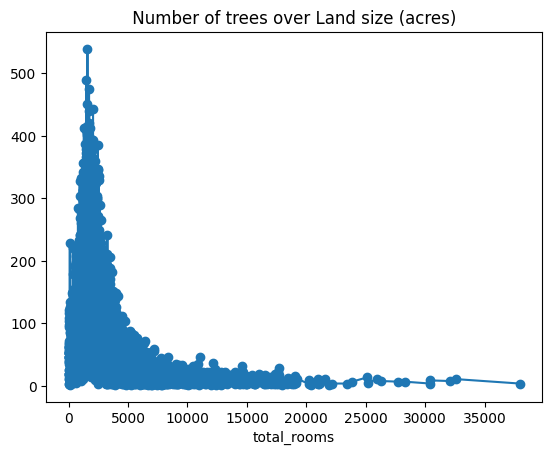

In [ ]:
# Time series and spatial data analysis
# 4.1 Time series analysis
# Get the actual column names from the DataFrame
print(df.columns)

# Replace 'Number of trees' and 'Land size (acres)' with actual column names
# based on the output of df.columns above.
# For example, if 'total_rooms' represents 'Number of trees' and
# 'housing_median_age' represents 'Land size (acres)', use those instead.

# Assuming 'total_rooms' represents 'Number of trees' and
# 'housing_median_age' represents 'Land size (acres)'
ts_data = df.groupby('total_rooms')['housing_median_age'].sum()  # aggregating the number of trees per land size (acres)
ts_data.plot(title=' Number of trees over Land size (acres) ', marker='o')  # plotting number of trees over different land size(acres)
plt.show()  # display the time series plot